In [1]:
# Imports
# for interactive
%matplotlib widget 
# for printing
# %matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pvlib import solarposition, location
from IPython.display import Markdown, Image
import ipywidgets as wds
#plt.style.use('seaborn-whitegrid')

# Energetica e Fonti Rinnovabili - Politecnico di Torino DENERG {-}

----

# Esercitazione 4 - Angoli solari

## Obiettivi di apprendimento
- Ricavare l’ora solare in uno specifico luogo del pianeta avendo a disposizione: l’ora del luogo, le sue coordinate (latitudine e longitudine, e longitudine del meridiano di riferimento) e il giorno dell’anno.
- Leggere una carta solare (o diagramma solare) per un dato luogo (per una certa latitudine) e a ricavare graficamente gli angoli solari azimut e altitudine solare essendo noti: il giorno dell’anno e l’ora solare. Ricavare graficamente le ore di alba e tramonto.
- Ricavare analiticamente gli angoli solari azimut e altitudine solare essendo noti: le coordinate del luogo (latitudine), il giorno dell’anno e l’ora solare. Confrontare i risultati analitici con quelli ottenuti dal diagramma solare.
- Calcolare analiticamente l’ora di alba e tramonto in un determinato luogo del pianeta in un giorno specifico avendo a disposizione: le coordinate del luogo e la data. Confrontare i risultati analitici con quelli ottenuti dal diagramma solare.

## Esercizi
1. Un osservatore si trova a Torino (Latitudine $L$ 45.00 N(+), longitudine $l$ 7.68 E(-)) il giorno 26 Marzo 2021. Sapendo che il meridiano di riferimento per Torino è quello dell’Etna (longitudine standard $l_{st}$ 15.00 E(-)) e che l’orologio segna le ore 10:00, calcolare l’ora solare corrispondente. Nota bene: il 26 Marzo non è attiva l’ora legale!
2. Viene fornito il diagramma solare di Torino (valido per la latitudine 45.00 N). Leggere tramite il diagramma quanto valgono gli angoli solari azimut e altitudine solare, ipotizzando che il giorno dell’anno sia il 26 Marzo 2021 e che l’ora solare sia quella ricavata nell’esercizio (1). Determinare anche l’ora di alba e tramonto per il 26 Marzo utilizzando il diagramma solare fornito. A partire dalle ore solari ottenute, ricavare le ore locali corrispondenti.

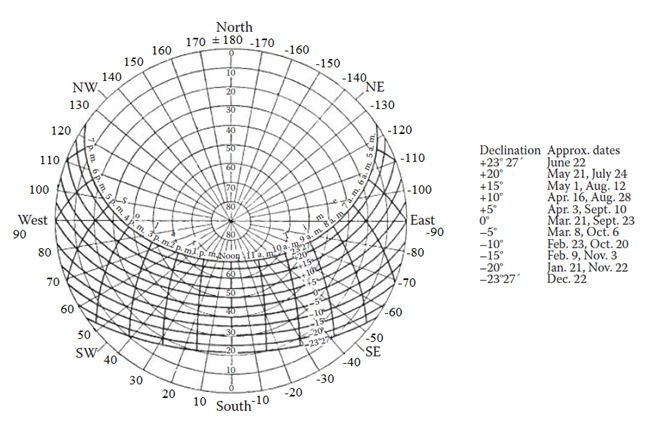

In [2]:
Image(filename="img/Sun_chart_45N.png")

3. Ricavare analiticamente gli angoli di azimut e altitudine solare visualizzati da un osservatore che si trova a Torino il 26 Marzo 2021 quando l’ora solare è quella ricavata nell’esercizio (1). Confrontare i risultati ottenuti con quelli letti graficamente nell’esercizio (2). Nota: calcolare analiticamente tutti gli angoli solari fondamentali non forniti nel testo. Nota: utilizzando il diagramma solare fornito nell’esercizio (2), scegliere quale formula analitica utilizzare per il calcolo dell’azimut.
4. Calcolare analiticamente l’ora solare di alba e tramonto per il giorno 26 Marzo 2021 a Torino. Confrontare gli orari ottenuti con quelli che si possono leggere dal diagramma solare ed ottenuti nell'esercizio (2).

## Esercizio 1
Un osservatore si trova a Torino (Latitudine $L$ 45.00 N(+), longitudine $l$ 7.68 E(-)) il giorno 26 Marzo 2021. Sapendo che il meridiano di riferimento per Torino è quello dell’Etna (longitudine standard $l_{st}$ 15.00 E(-)) e che l’orologio segna le ore 10:00, calcolare l’ora solare corrispondente. Nota bene: il 26 Marzo non è attiva l’ora legale!

### Dati:

In [3]:
# Dati input
L = 45 # Lat [°]
l_local = -7.68 # Long [°]
l_st = -15 # long standard [°]
data = pd.to_datetime('2021-03-26 10:00') # '2021-03-26 10:00'
col = 0 # 1 se ora legale, altrimenti 0. Per il 2021, l'ora legale è attiva dal 28 Marzo al 31 ottobre.
ora = data.hour+data.minute/60 # [h] in ore decimali
# Dati ricavati
n = data.dayofyear # Numero identificativo del giorno in esame rispetto l'anno 
# Output
Markdown(f'$L = {L}^{{\circ}}; l_{{local}} = {l_local}^{{\circ}}; l_{{st}} = {l_st}^{{\circ}}; ora = {ora} \ h;  n = {n}$')

$L = 45^{\circ}; l_{local} = -7.68^{\circ}; l_{st} = -15^{\circ}; ora = 10.0 \ h;  n = 85$

### Procedimento
L'ora solare in ogni posto si riferisce al tempo preciso in cui il sole attraversa il piano nord-sud equivalente al meridiano del posto (mezzogiorno solare) dove raggiunge anche la culminazione (la massima elevazione, o altitudine). Il tempo solare differisce dall'ora di un comune orologio a causa del fuso orario del meridiano di riferimento e dall'equazione del tempo.  

Per calcolare l'ora solare, o *Solar Time* $ST$, si applica l'equazione seguente:
$$ST = LST + ET + (l_{st}-l_{local})\cdot4 \quad [min] \quad (1)$$
$LST$ è il *Local Standard Time*, cioè l'ora locale riferita al fuso orario in cui si trova l'osservatore (l'ora di orologio). Il fuso orario è una porzione longitudinale della superficie terrestre compresa tra due determinati meridiani che adotta lo stesso orario per scopi legali, economici e sociali ([qui](https://it.wikipedia.org/wiki/Fuso_orario#/media/File:World_Time_Zones_Map.png) mappa dei fusi orari). Il fuso orario è a sua volta riferito al tempo coordinato universale o tempo civile *UTC*, il fuso orario scelto come riferimento globale (longitudine equivalente nella zona del Meridiano di Greenwich), a partire dal quale sono calcolati tutti i fusi orari del mondo.

In Italia si adotta il fuso orario *Central European Time CET* corrispondente a *UTC+1* e riferito al meridiano dell'Etna (-15°). Inoltre, durante il periodo estivo vige l'ora legale, dunque sarà necessario aggiungere un'ora al *CET* (si chiamerà *Central European Summer Time CEST*). In figura, la posizione dell'osservatore rispetto la terra:

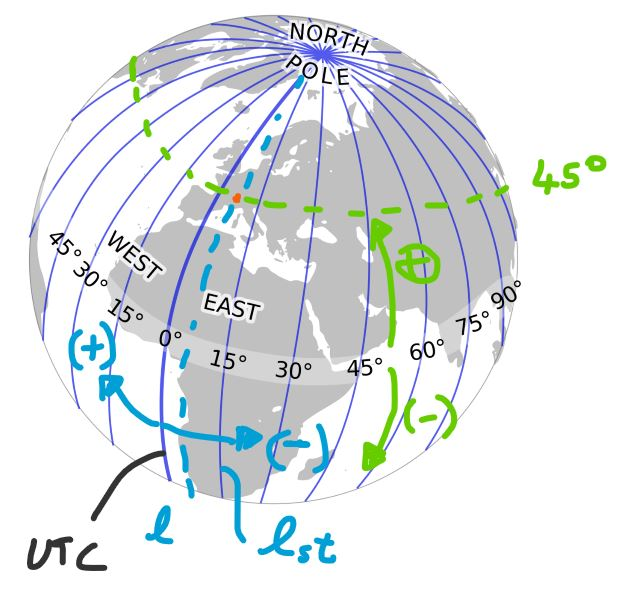

In [4]:
Image(filename="img/globo_45N.JPG", width=500)

Nel caso in esame, al giorno 26 Marzo 2020, **non** è attiva l'ora legale, per cui:

In [5]:
LST = (ora - col)*60
Markdown(f'$LST = ora - {col} = {ora-col} \ h = {round(LST,2)} \ min$')

$LST = ora - 0 = 10.0 \ h = 600.0 \ min$

L'equazione del tempo $ET$ si calcola con la seguente equazione:
$$ET = 9.87\sin 2B -7.53\cos B -1.5\sin B  \quad [min] \quad (2)$$
$$B = \frac{360(n-81)}{364} \quad [^{{\circ}}] \quad (3)$$

> **Nota**: B è espresso in gradi, quindi gli argomenti delle funzioni seno e coseno sono in gradi!

L'equazione del tempo è la conseguenza dell'azione combinata tra l'inclinazione dell'asse e l'eccentricità dell'orbita della Terra attorno al Sole. Di seguito la funzione di ET:

In [6]:
# ET function
nx = np.array([x for x in range(1,366)])
Bx = (360*(nx-81)/364)*np.pi/180
ETy = 9.87*np.sin(2*Bx)-7.53*np.cos(Bx)-1.5*np.sin(Bx)
fig, ax = plt.subplots(1,1,figsize=(6, 4))
fig.canvas.header_visible = False
ax.plot(nx,ETy,c='g')
ax.set_title('Equazione del Tempo')
ax.set_xlabel('n')
ax.set_ylabel('ET [min]')
ax.grid('on')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

> **Nota**: Una rappresentazione visiva dell'effetto dell'equazione del tempo e della declinazione terrestre è l'analemma, cioè una particolare curva geometrica a forma di otto che descrive la posizione del Sole nei diversi giorni dell'anno, alla stessa ora e nella località o meridiano dell'osservatore ([qui](https://www.geogebra.org/m/vd3qpad8) un esempio di Analemma interattivo).

Nel giorno in esame, usando le equazioni (2) e (3) otteniamo:

In [7]:
# ET for n
B = 360*(n-81)/364
B_rad = B*np.pi/180
ET = 9.87*np.sin(2*B_rad)-7.53*np.cos(B_rad)-1.5*np.sin(B_rad)
Markdown(f'$B = {round(B,3)}^{{\circ}}={round(B_rad,5)} \ rad \implies  ET = {round(ET,2)} \ min$')

$B = 3.956^{\circ}=0.06905 \ rad \implies  ET = -6.26 \ min$

L'ultimo argomento dell'equazione (1) è la correzione longitudinale per tenere conto della diversa longitudine dell'osservatore rispetto al meridiano standard, e dove il fattore $4$ sono $min/^{\circ}$, corrispondente a $60 \ min$ ogni $15^{\circ}$ (il tempo che impiega la terra a ruotare rispetto la distanza di due meridiani consecutivi).

In [8]:
corr_long = (l_st - l_local)*4
Markdown(f'$(l_{{st}}-l_{{local}})\cdot4 = {round(corr_long,2)} \ min$')

$(l_{st}-l_{local})\cdot4 = -29.28 \ min$

Dunque, avendo calcolato tutti gli argomenti dell'equazione (1), facendo attenzione a riportarli tutti in minuti, possiamo calcolare l'ora solare $ST$:

In [9]:
ST = LST + ET + corr_long
ST_h = ST/60
ST_hour = int(ST_h)
ST_min = int((ST_h-ST_hour)*60)
Markdown(f'$ST = {round(ST,2)} \min$ => ${round(ST/60,2)} \ h$ => ${ST_hour:02d}{{:}}{ST_min:02d}$')

$ST = 564.46 \min$ => $9.41 \ h$ => $09{:}24$

## Esercizio 2
Viene fornito il diagramma solare di Torino (valido per la latitudine 45.00 N). Leggere tramite il diagramma quanto valgono gli angoli solari azimut e altitudine solare, ipotizzando che il giorno dell’anno sia il 26 Marzo 2021 e che l’ora solare sia quella ricavata nell’esercizio (1). Determinare anche l’ora di alba e tramonto per il 26 Marzo utilizzando il diagramma solare fornito. A partire dalle ore solari ottenute, ricavare le ore locali corrispondenti.

### Procedimento

L'esercizio viene risolto utilizzando i risultati dell'esercizio precedente ed il diagramma solare fornito durante l'esercitazione (valido per Latitudine 45° N):

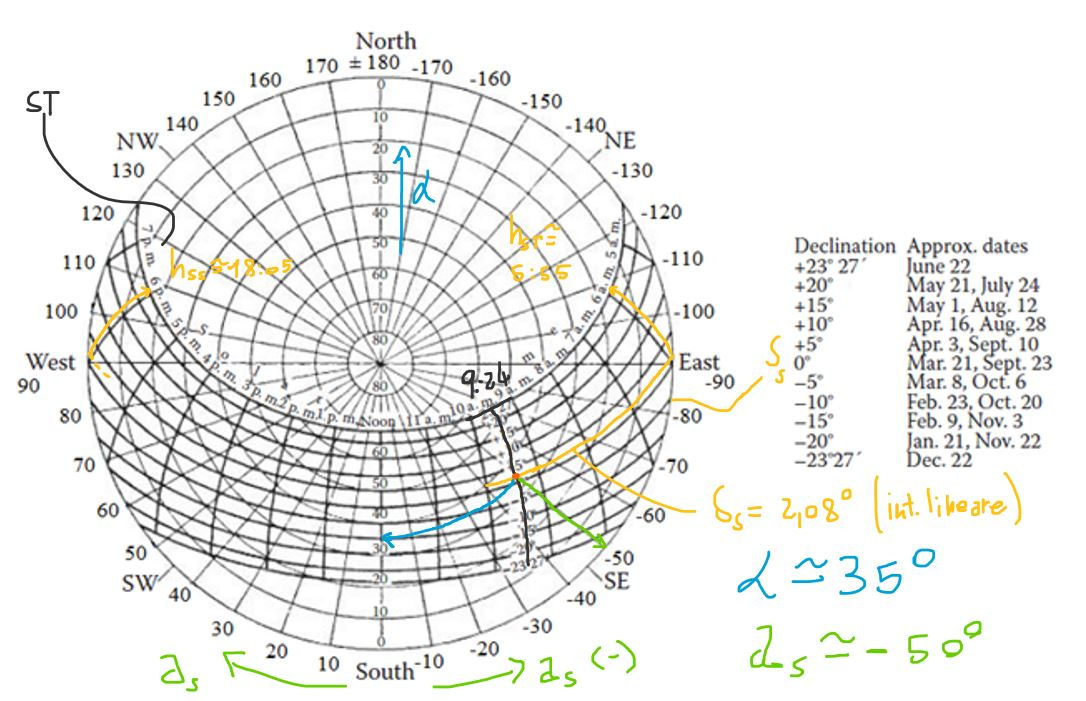

In [10]:
Image(filename="img/sunpath_es2.JPG")

Dall'analisi del diagramma otteniamo i seguenti risultati:

- Declinazione $\delta_s \simeq 2.083^{{\circ}}$ (per interpolazione lineare tra Mar. 21 0° e Apr. 3 +5°)
- Azimuth $a_s \simeq -50^{{\circ}}$
- Altitudine solare $\alpha \simeq 35^{{\circ}}$
- Alba $ST_{sr} \simeq$ 5:55 => $LST_{sr} \simeq$ 6:30
- Tramonto $ST_{ss} \simeq$ = 18:05 => $LST_{ss} \simeq$ 18:40

## Esercizio 3
Ricavare analiticamente gli angoli di azimut e altitudine solare visualizzati da un osservatore che si trova a Torino il 26 Marzo 2021 quando l’ora solare è quella ricavata nell’esercizio (1). Confrontare i risultati ottenuti con quelli letti graficamente nell’esercizio (2). Nota: calcolare analiticamente tutti gli angoli solari fondamentali non forniti nel testo. Nota: utilizzando il diagramma solare fornito nell’esercizio (2), scegliere quale formula analitica utilizzare per il calcolo dell’azimut.

### Procedimento

Per calcolare analiticamente gli angoli solari *azimuth* $a_s$ e *altitudine solare* $\alpha$ (o il complementare *zenith* $\theta$) è necessario conoscere le relazioni trigonometriche che legano i suddetti angoli solari (riferimento sole-osservatore) con gli angoli solari fondamentali (riferimento sole-terra): *latitudine* $L$, *declinazione* $\delta_s$ e *angolo solare* $h_s$. Di seguito un'illustrazione degli angoli solari:

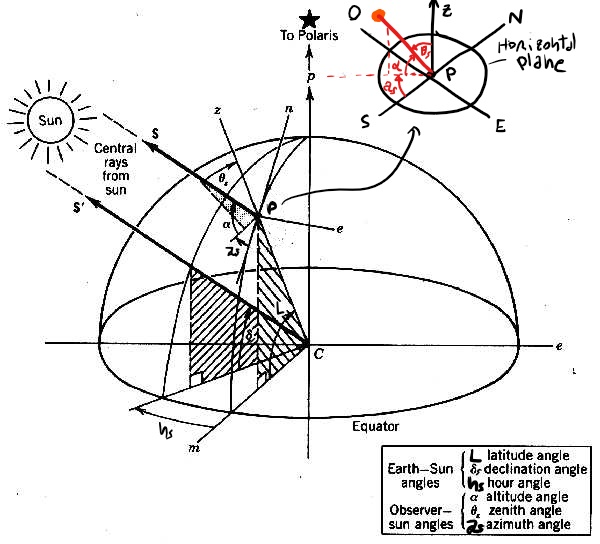

In [27]:
Image(filename="img/angoli_solari.jpg")

La latitudine definisce la posizione dell'osservatore rispetto alla terra. La declinazione solare è l'angolo tra la linea dei raggi solari e il piano passante per l'equatore. Come visto a lezione, è un angolo compreso tra -23.45° (sud equatore) e +23.45° (nord equatore). La declinazione può essere calcolata in funzione del giorno dell'anno $n$, secondo l'equazione:
$$\delta_s = 23.45^{{\circ}}\sin\left( \frac{360(284+n)}{365^{{\circ}}} \right) \quad [^{{\circ}}]$$

> **Nota**: l'argomento del seno è espresso in gradi!

Di seguito il grafico di $\delta_s$ in funzione di $n$:

In [12]:
# declination function
deltay = 23.45*np.sin(np.radians(360/365*(284+nx)))
fig1, ax1 = plt.subplots(1,1,figsize=(6, 4))
fig1.canvas.header_visible = False
ax1.plot(nx,deltay, c='red')
ax1.set_title('Declinazione')
ax1.set_xlabel('n')
ax1.set_ylabel('$\delta_s$ [°]')
ax1.grid('on')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
declination = solarposition.declination_cooper69(n) * 180 / np.pi # gradi, stessa formula usata a lezione
Markdown(f'Al giorno $n={n}$ la declinazione solare sarà $\delta_s={round(declination,3)}^{{\circ}}$')

Al giorno $n=85$ la declinazione solare sarà $\delta_s=1.613^{\circ}$

L'angolo solare $h_s$ esprime in gradi la distanza oraria (espressa in ore decimali o minuti) tra l'ora solare ed il mezzogiorno solare vero 12:00 (cioè l'ora solare in cui il sole si trova nel piano nord-sud, o meridiano, e raggiunge la culminazione):
$$h_s = 15[^{{\circ}}/h]\cdot(ST[h]-12)=\frac{ST[min]-12\cdot60}{4[min/^{{\circ}}]} \quad [^{{\circ}}] \quad (3)$$


In [14]:
h_s = (ST_h-12)*15
Markdown(f'L\'ora solare calcolata nell\'esercizio è $ST={round(ST_h,2)} \ h$, equivalente ad un angolo solare $h_s = {round(h_s,2)}^{{\circ}}$.')        

L'ora solare calcolata nell'esercizio è $ST=9.41 \ h$, equivalente ad un angolo solare $h_s = -38.88^{\circ}$.

L'altitudine solare $\alpha$ si calcola attraverso la seguente relazione trigonometrica:
$$\sin \alpha=\sin L \sin \delta_s + \cos L \cos \delta_s \cos h_s \quad [rad] \quad (4)$$

In [15]:
alpha = np.arcsin(np.sin(np.radians(L))*np.sin(np.radians(declination))+np.cos(np.radians(L))*np.cos(np.radians(declination))*np.cos(np.radians(h_s)))
Markdown(f'Risolvendo si ottiene $\alpha = {round(alpha,4)}\ rad={round(alpha*180/np.pi,2)}^{{\circ}}$.')

Risolvendo si ottiene $lpha = 0.6066\ rad=34.76^{\circ}$.

L'azimuth solare $a_s$ si calcola attraverso la seguente relazione trigonometrica:
$$\sin a_s  = \frac{\cos \delta_s \sin h_s}{\cos \alpha } \quad [rad] \quad (5)$$

>**Attenzione**: valida solo se $|a_s|<90^{{\circ}}$.

Per capire se $|a_s|>90^{{\circ}}$ possiamo utilizzare il diagramma solare e visivamente individuare le zone del traggitto del sole in cui si troverà verso Nord, oltre la linea est-ovest. Possiamo notare dal diagramma solare che il sole si trova verso Sud e dunque ci troviamo sicuramente nella condizione $|a_s|<90^{{\circ}}$.

In alternativa, se $|L|>|\delta_s|$ possiamo calcolare analiticamente l'angolo solare $h_{s,ew}$ che intercetta la linea est-ovest, cioè nel momento in cui l'azimuth solare $a_s$ è pari a +90° o -90° (il sole si troverà nella linea est/ovest). Dunque, imponendo $a_s=90^{{\circ}}$ e risolvendo il sistema di equazioni (4) e (5) per l'angolo solare $h_{s,ew}$ otteniamo:
$$a_s = 90^{{\circ}} \implies h_{s,ew} = \cos^{-1}\left(\cot L \tan \delta_s \right) \quad [rad]$$
Se risulta $|h_s|<h_{s,iew}$ allora siamo certi che $|a_s|<90^{{\circ}}$.

Se invece ci troviamo ai tropici e $|L|\leq|\delta_s|$, il sole rimarrà sempre a Nord (Sud nell'emisfero Sud) rispetto la linea est/ovest ed il valore di $a_s$ sarà sempre maggiore (minore) di 90°, dunque l'espressione per il calcolo di $h_{s,ew}$ non è più valida.

Quando $|a_s|>90^{{\circ}}$ si dovrà utilizzare la formula corretta vista a lezione.

In [16]:
h_sew = np.arccos(np.tan(np.radians(declination))/np.tan(np.radians(L)))*180/np.pi
Markdown(f'Nel nostro caso $h_{{s,ew}}={round(h_sew,2)}^{{\circ}}>|h_s| \implies |a_s|<90^{{\circ}}$.')


Nel nostro caso $h_{s,ew}=88.39^{\circ}>|h_s| \implies |a_s|<90^{\circ}$.

In [17]:
a_s0 = np.arcsin(np.cos(np.radians(declination))*np.sin(np.radians(h_s))/np.cos(alpha))
Markdown(f'Dunque, utilizzando la formula (5) e risolvendo otteniamo $a_s={round(a_s0,4)}\ rad= {round(a_s0*180/np.pi,2)}^{{\circ}}$.')

Dunque, utilizzando la formula (5) e risolvendo otteniamo $a_s=-0.8692\ rad= -49.8^{\circ}$.

## Esercizio 4
Calcolare analiticamente l’ora solare di alba e tramonto per il giorno 26 Marzo 2021 a Torino. Confrontare gli orari ottenuti con quelli che si possono leggere dal diagramma solare nell'esercizio (2).

### Procedimento
Per il calcolo dell'ora solare di alba e tramonto basterà utilizzare la formula (4) trovando l'angolo orario ed imporre $\alpha=0$, cioè quando il sole si trova nel piano orizzontale dell'osservatore:
$$\alpha=0° \implies h_{ss} \ \text{or} \ h_{sr} = \pm \cos^{-1}\left ( -\tan L \tan \delta_s \right ) \quad [rad]$$

In [18]:
hss = np.arccos(-np.tan(np.radians(L))*np.tan(np.radians(declination)))*180/np.pi
hsr = -np.arccos(-np.tan(np.radians(L))*np.tan(np.radians(declination)))*180/np.pi
Markdown(f'Otteniamo $h_{{ss}}={round(hss,2)}^{{\circ}}$ e $h_{{sr}}={round(hsr,2)}^{{\circ}}$.')

Otteniamo $h_{ss}=91.61^{\circ}$ e $h_{sr}=-91.61^{\circ}$.

>**Nota**: La relazione per il calcolo degli angoli solari di alba e tramonto considera il centro del cerchio solare sull'orizzonte. In altre parole, alba e tramonto sono definiti come i momenti in cui l'arco superiore del sole si trova nell'orizzonte. 

In [19]:
STss = hss/15+12
STsr =hsr/15+12
Markdown(f'Per il calcolo delle ore solari corrispondenti basterà applicare la formula (3). Dunque avremo $ST_{{ss}}={round(STss,2)}\ h$ e $ST_{{sr}}={round(STsr,2)}\ h$.')

Per il calcolo delle ore solari corrispondenti basterà applicare la formula (3). Dunque avremo $ST_{ss}=18.11\ h$ e $ST_{sr}=5.89\ h$.

In [20]:
STss_h = STss
STss_hour = int(STss_h)
STss_min = int((STss_h-STss_hour)*60)
STsr_h = STsr
STsr_hour = int(STsr_h)
STsr_min = int((STsr_h-STsr_hour)*60)
Markdown(f'Convertendo in HH:MM otteniamo $ST_{{ss}}={STss_hour:02d}{{:}}{STss_min:02d}$ e $ST_{{sr}}={STsr_hour:02d}{{:}}{STsr_min:02d}$.')

Convertendo in HH:MM otteniamo $ST_{ss}=18{:}06$ e $ST_{sr}=05{:}53$.

In [21]:
LSTss = STss_h*60 - ET - corr_long
LSTss_h = LSTss/60
LSTss_hour = int(LSTss_h)
LSTss_min = int((LSTss_h-LSTss_hour)*60)
LSTsr = STsr_h*60 - ET - corr_long
LSTsr_h = LSTsr/60
LSTsr_hour = int(LSTsr_h)
LSTsr_min = int((LSTsr_h-LSTsr_hour)*60)
Markdown(f'Infine, utilizzando l\'equazione (1) possiamo ottenere l\'ora locale di alba e tramondo: $LST_{{ss}}={LSTss_hour:02d}{{:}}{LSTss_min:02d}$ e $LST_{{sr}}={LSTsr_hour:02d}{{:}}{LSTsr_min:02d}$.')

Infine, utilizzando l'equazione (1) possiamo ottenere l'ora locale di alba e tramondo: $LST_{ss}=18{:}41$ e $LST_{sr}=06{:}29$.

## Confronto metodo grafico Esercizio 2 con metodo analitico Esercizi 3/4
|  | Metodo analitico | Metodo Grafico |
| :- | :-: | :-: |
| $\delta_s$ | 1.61° | 2.08° |
| $\alpha$ | 34.76° | 35° |
| $a_s$ | -49.8° | -50° |
| $ST_{ss}$ | 18:06 | 18:05 |
| $ST_{sr}$ | 05:53 | 05:55 |

## Extra
### Carta solare con Python e tool online

E' possibile ricostruire il diagramma solare utilizzando librerie specifiche in Python, e.g. *pvlib*. Di seguito un elaborazione del diagramma per la località e la data scelta in input. Il diagramma solare potrebbe differire leggermente da quello visto a lezione a causa di un diverso sistema di riferimento. In questo caso si nota che: i) il raggio rappresenta lo zenith piuttosto che l'altezza solare; ii) il diagramma è riferito all'orario locale $LST$ (civile, escludendo l'ora legale) e per tale ragione sono presenti gli analemmi, necessari per tenere conto dell'ora solare e dunque della reale posizione del sole. Fissata l'ora $LST$, la colorbar ci aiuta ad identificare in quale punto dell'analemma ci troviamo in base al giorno dell'anno, quindi identificando esattamente la declinazione, lo zenith e l'azimuth solare.

In [22]:
# Sun path diagram per una determinata località
# Per semplicità, utilizzare l'ora locale (non considerando l'ora legale) senza definire la time zone (anche se siamo sempre in CET UTC+1 e CEST UTC+2 nel caso in esame)
year = data.year
# range di un anno
times = pd.date_range(f'{year}-01-01 00:00:00', f'{year+1}-01-01', closed='left', freq='H', tz='UTC')
# calcolo posizione solare
solpos = solarposition.get_solarposition(times, L, l_local, method='ephemeris') # lo converte sempre in UTC
# rimuovi la notte
solpos = solpos.loc[solpos['elevation'] > 0, :]

# Sun path
fig1 = plt.figure(figsize=(12,6))
fig1.canvas.header_visible = False
ax1 = plt.subplot(1, 1, 1, projection='polar')
# cambio del riferimento della coordinata theta
corr = -180
# Disegno analemmi
points = ax1.scatter(np.radians(solpos.azimuth + corr), solpos.zenith,s=2, label=None, c=solpos.index.dayofyear)
ax1.figure.colorbar(points,label='n - day of the year')

# Disegno labels delle ore
for hour in np.unique(solpos.index.hour):
    # choose label position by the smallest radius for each hour
    subset = solpos.loc[solpos.index.hour == hour, :]
    r = subset.zenith
    pos = solpos.loc[r.idxmin(), :]
    ax1.text(np.radians(pos['azimuth'] + corr), pos['zenith'], str(hour))
    
# Disengno sun path particolari (soltizi ed equinozi)
# Info 2021: Solstizio 21 giugno 03:32 Solstizio 21 dicembre 15:59 Equinozio 20 marzo 09:37 Equinozio 22 settembre 19:21
days = {'2020-06-21':23.45, '2020-03-20':0, '2020-12-21':-23.45}
for date in pd.to_datetime(list(days.keys())):
    times = pd.date_range(date, date + pd.Timedelta('24h'), freq='5min', tz='UTC')
    solpos = solarposition.get_solarposition(times, L, l_local)
    solpos = solpos.loc[solpos['elevation'] > 0, :]
    label = date.strftime('%m-%d')
    d = date.strftime('%Y-%m-%d')
    ax1.plot(np.radians(solpos.azimuth + corr), solpos.zenith, label=label+f' $\delta_s \simeq$ {days[d]}°')

ax1.figure.legend(loc='upper left')

ax1.set_title(f'Sun path diagram. LAT {L}° LON {l_local}°')
# cambio coordinate
theta_labels = list(np.linspace(0,180,18,endpoint=False,dtype='int'))+list(np.linspace(-180,0,18,endpoint=False,dtype='int'))
theta_labels = [f'{str(elem)}°' for elem in theta_labels]
ax1.set_theta_zero_location('S')
ax1.set_theta_direction(-1)
ax1.set_rmax(90)
ax1.set_rlabel_position(140)
ax1.set_thetagrids(np.linspace(0,360,36, endpoint=False),labels=theta_labels)
fig1.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Nel seguente diagramma si evidenzia la posizione del sole nel giorno e nell'ora considerata, con l'indicazione dell'ora di alba e tramonto. 

In [23]:
# Posizione sole nel caso studio
time = data-pd.Timedelta(hours=col) # per correggere ora legale

ETl = pd.to_timedelta(np.array(solarposition.equation_of_time_pvcdrom(n)), unit='minutes')
solar_timel = time + ETl + pd.Timedelta(minutes=(l_st - l_local) * 4) # da verificare UTC

pos = solarposition.get_solarposition(time, L, l_local, method='ephemeris')
azimuthl = pos.azimuth[0]
zenithl = pos.zenith[0]
# print(pos.iloc[0])
# print(ET.total_seconds() / 60)
# print(solar_time)

fig2 = plt.figure(figsize=(12,6))
fig2.canvas.header_visible = False
ax2 = plt.subplot(1, 1, 1, projection='polar')
# cambio del riferimento della coordinata theta per il grafico
corr = -180
# Analemma per l'ora in esame 
times = pd.date_range(time,time +pd.Timedelta(days=364),freq='D', tz='UTC')
solpos = solarposition.get_solarposition(times, L, l_local, method='ephemeris')  # lo converte in UTC
# remove nighttime
solpos = solpos.loc[solpos['elevation'] > 0, :]
points = ax2.scatter(np.radians(solpos.azimuth + corr), solpos.zenith, s=2, label=None,c=np.unique(solpos.index.dayofyear))
ax2.figure.colorbar(points, label = f'n = {n}')
# Posizione sole
ax2.scatter(np.radians(pos.azimuth + corr),pos.zenith, s=40, label=None, c='red')
# Ora posizione
r = solpos.zenith
postext = solpos.loc[r.idxmin(), :]
ax2.text(np.radians(postext['azimuth'] + corr), postext['zenith'], time.strftime('%H:%M'))
# Disengno sun path particolari (soltizi ed equinozi)
color = {'2020-06-21':'tab:blue', '2020-03-20':'tab:orange', '2020-12-21':'tab:green',time.strftime('%Y-%m-%d'):'tab:red'}
days = {'2020-06-21':23.45, '2020-03-20':0, '2020-12-21':-23.45,time.strftime('%Y-%m-%d'):round(declination,2)}
for date in pd.to_datetime(list(days.keys())):
    times = pd.date_range(date, date + pd.Timedelta('24h'), freq='1min', tz='UTC')
    solpos = solarposition.get_solarposition(times, L, l_local)
    solpos = solpos.loc[solpos['elevation'] >= 0, :]
    label = date.strftime('%m-%d')
    d = date.strftime('%Y-%m-%d')
    ax2.plot(np.radians(solpos.azimuth + corr), solpos.zenith, label=label+f' $\delta_s \simeq$ {days[d]}°',c=color[d])

sun_rise_set_transit = solarposition.sun_rise_set_transit_ephem(times,L,l_local).iloc[0]
sunrise = sun_rise_set_transit['sunrise']
sunset = sun_rise_set_transit['sunset']

postext = solpos.iloc[0]
ax2.text(np.radians(postext['azimuth'] + corr)-0.05, postext['zenith'], sunrise.strftime('%H:%M'))
ax2.scatter(np.radians(postext.azimuth + corr),postext.zenith, s=40, label=None, c='red')
postext = solpos.iloc[-1]
ax2.text(np.radians(postext['azimuth'] + corr)-0.05, postext['zenith']-5, sunset.strftime('%H:%M'))
ax2.scatter(np.radians(postext.azimuth + corr),postext.zenith, s=40, label=None, c='red')
ax2.figure.legend(loc='upper left')

textstr = '\n'.join((f'Date {time.date()} LST {time.time()}',
    r'$Azimuth \ a_s=%.2f °$' % (-180+azimuthl, ),
    r'$Altitude \ \alpha=%.2f ° \ (zenith \ \theta=%.2f °)$' % (90-zenithl,zenithl, )))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax2.figure.text(0.01, 0.15, textstr, fontsize=12,
        verticalalignment='top', bbox=props)

ax2.set_title(f'Sun path diagram. LAT {L}° LON {l_local}°')
# cambio coordinate
ax2.set_theta_zero_location('S')
ax2.set_theta_direction(-1)
ax2.set_rmax(90)
ax2.set_rlabel_position(140)
ax2.set_thetagrids(np.linspace(0,360,36, endpoint=False),labels=theta_labels)
fig2.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
print('Confronto risultati libreria Python con risultati ottenuti in classe:')
print('pvlib:')
print(pos.loc[time])
print()
print('Ora solare calcolata ', round(ST_h,2), 'h')
print('Equazione del tempo libreria ',round(ETl.total_seconds()/60,2))
print('Equazione del tempo calcolata ',round(ET,2))
cooper = solarposition.declination_cooper69(n) * 180 / np.pi # gradi
spencer = solarposition.declination_spencer71(n) * 180 / np.pi # gradi
print('Declinazione eq. cooper (usata in classe)', round(cooper,2),'°')
print('Declinazione eq. spencer', round(spencer,2),'°')

Confronto risultati libreria Python con risultati ottenuti in classe:
pvlib:
apparent_elevation     35.306798
elevation              35.284205
azimuth               129.492523
apparent_zenith        54.693202
zenith                 54.715795
solar_time              9.394288
Name: 2021-03-26 10:00:00, dtype: float64

Ora solare calcolata  9.41 h
Equazione del tempo libreria  -6.26
Equazione del tempo calcolata  -6.26
Declinazione eq. cooper (usata in classe) 1.61 °
Declinazione eq. spencer 1.9 °


> **Nota**: la libreria *pvlib* utilizza delle formulazioni più precise per il calcolo della posizione del sole (azimuth, zenith e declinazione) e dell'ora solare rispetto alle formule utilizzate in classe. Nonostante ciò, si può notare come le formule utilizzate rappresentino comunque un'ottima approssimazione. Infine, i valori apparenti di altitudine e zenith solari sono riferiti al bordo superiore del sole quando tocca l'orizzonte. 

In [25]:
date = data.strftime('%Y.%m.%d')
ora = data.time().strftime('%H:%M')
url = f'https://www.suncalc.org/#/{L},{-l_local},18/{date}/{ora}/0/1'
Markdown(f'Infine, sul sito [suncalc]({url}) troverete un tool per visualizzare il percorso del sole (e tante altre utili informazioni) direttamente su mappa, geolocalizzato con i dati di input al notebook. ')

Infine, sul sito [suncalc](https://www.suncalc.org/#/45,7.68,18/2021.03.26/10:00/0/1) troverete un tool per visualizzare il percorso del sole (e tante altre utili informazioni) direttamente su mappa, geolocalizzato con i dati di input al notebook. 

### Correzione formula calcolo azimuth solare $a_s$
Per risolvere il problema di validità della formula (5) (valida solo per $a_s<0$) sarà necessario utilizzare una formulazione corretta, valida per qualsiasi angolo di azimuth solare:
$$\begin{align*}
a_s &= \sigma_{ew} \sigma_{ns} a_{s_0} +\left (  \frac{1-\sigma_{ew}\sigma_{ns}}{2}\right ) \sigma_w\cdot 180^{{\circ}}\\
\text{dove:} \\
a_{s_0} &=\sin^{-1}\left ( \frac{\cos \delta_s \sin h_s }{\cos \alpha} \right ) \quad [^{{\circ}}] \\
h_{s,ew}  &=  \begin{cases} \cos^{-1}\left(\cot L \tan \delta_s \right), & \text{se} \ |L|>|\delta_s| \\ M, & \text{altrimenti} \  \end{cases}\\
\sigma_{ew} &= \begin{cases} 1, & \text{se} \ |h_s|< h_{s,ew} \\ -1, & \text{altrimenti} \end{cases} \\
% \sigma_{ns}  &= \begin{cases} 1, & \text{se} \ L(L-\delta_s)\geq0 \\ -1, & \text{altrimenti} \end{cases} \\
\sigma_{ns}  &= \begin{cases} 1, & \text{se} \ L>\delta_s \\ -1, & \text{altrimenti} \end{cases} \\
\sigma_w &= \begin{cases} 1, & \text{se} \ h_s\geq 0 \\ -1, & \text{altrimenti} \end{cases} \\
\end{align*}$$ 

> **Nota**: $M$ è un numero molto grande tale che si verifichi sempre $|h_s|< h_{s,ew}$.

In [26]:
h_sew = np.arccos(np.tan(np.radians(declination))/np.tan(np.radians(L)))*180/np.pi
h_sew = 1000 if np.isnan(h_sew) else h_sew
# Markdown(f'Nel nostro caso $h_{{s,ew}}={round(h_sew,2)}°>|h_s| \implies |a_s|<90°$.')
print('Esempio numerico riferito all\'esercizio:')
print('h_s =',round(h_s,2),'°')
print('h_sew =',round(h_sew,2),'°')
a_s0 = np.arcsin(np.cos(np.radians(declination))*np.sin(np.radians(h_s))/np.cos(alpha))
sigma_ew = 1 if np.abs(h_s)<h_sew else -1
sigma_ns = 1 if L>declination else -1
# sigma_ns = 1 if L*(L-declination)>=0 else -1 
sigma_w = 1 if h_s>=0 else -1
print('a_s0 =',round(a_s0*180/np.pi,2),'°')
print('sigma_ew =',sigma_ew)
print('sigma_ns =',sigma_ns)
print('sigma_w =',sigma_w)
a_s = sigma_ew*sigma_ns*a_s0*180/np.pi+((1-sigma_ew*sigma_ns)/2)*sigma_w*180
print('a_s =',round(a_s,2),'°')

Esempio numerico riferito all'esercizio:
h_s = -38.88 °
h_sew = 88.39 °
a_s0 = -49.8 °
sigma_ew = 1
sigma_ns = 1
sigma_w = -1
a_s = -49.8 °


-------
Rev. 1 - 22/03/2021

Le versioni statiche dei notebooks le trovate online su [![GitHub](https://badgen.net/badge/icon/github?icon=github&label)](https://github.com/DSSchiera/materials). Invece, le versioni interattive dei notebooks li trovate su [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DSSchiera/materials/HEAD)
